In [3]:
from google.colab import files

uploaded = files.upload()  # Select "Advertising.csv" from your computer


Saving Advertising.csv to Advertising.csv


In [4]:
import os
print(os.listdir('/content'))


['.config', 'Advertising.csv', 'gc2.mp4', 'sample_data']


In [5]:
import pandas as pd

df = pd.read_csv('/content/Advertising.csv')
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Check dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Drop the unnecessary column
df = df.drop(columns=['Unnamed: 0'])
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


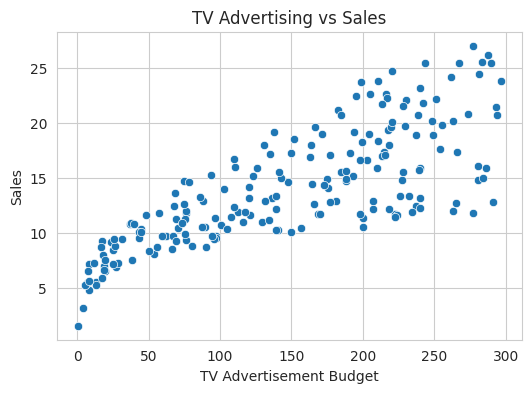

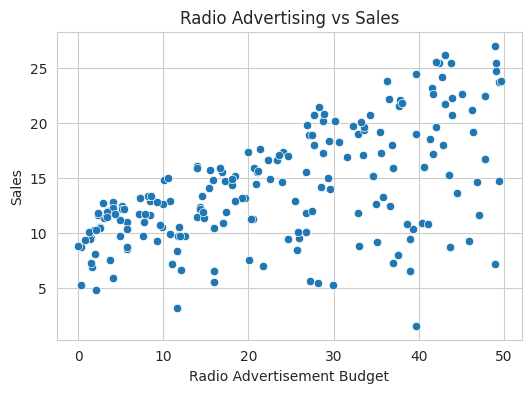

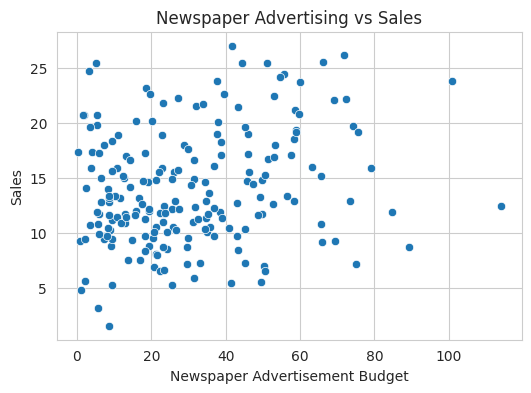

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Scatter plot for TV vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["TV"], y=df["Sales"])
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Advertisement Budget")
plt.ylabel("Sales")
plt.show()

# Scatter plot for Radio vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Radio"], y=df["Sales"])
plt.title("Radio Advertising vs Sales")
plt.xlabel("Radio Advertisement Budget")
plt.ylabel("Sales")
plt.show()

# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Newspaper"], y=df["Sales"])
plt.title("Newspaper Advertising vs Sales")
plt.xlabel("Newspaper Advertisement Budget")
plt.ylabel("Sales")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Selecting features (TV and Radio)
X = df[["TV", "Radio"]]
y = df["Sales"]

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape of training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((160, 2), (40, 2), (160,), (40,))

In [10]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 3.028255250783305
Coefficients: [0.0447283  0.19066726]


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict sales for test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.44
Mean Squared Error (MSE): 3.14
Root Mean Squared Error (RMSE): 1.77
R² Score: 0.90


In [12]:
import joblib

# Save the model
joblib.dump(model, "sales_prediction_model.pkl")

print("Model saved successfully!")


Model saved successfully!
